___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [2]:
from pandas_datareader import data, wb
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [3]:
#Set start and end date for stock prices
start, end = datetime.datetime(2006, 1, 1), datetime.datetime(2016, 1, 1)

In [4]:
"""
Google API is no longer supported, data is pulled from Quandl's API referenced in the documentation page listed above.
Symbols are composed of DB name and ticker name. The DB name for US stocks is 'WIKI.'

Free registration for API key at Quandl.com

"""
symbols = ["WIKI/" + x for x in ["BAC","C","GS","JPM","MS","WFC"]]

    
#Create stock price data frames
BAC = data.DataReader(symbols[0], "quandl", start, end, api_key = "y89LxYwNmx1x2Q6Q2zsX")
C = data.DataReader(symbols[1], "quandl", start, end, api_key = "y89LxYwNmx1x2Q6Q2zsX")
GS = data.DataReader(symbols[2], "quandl", start, end, api_key = "y89LxYwNmx1x2Q6Q2zsX")
JPM = data.DataReader(symbols[3], "quandl", start, end, api_key = "y89LxYwNmx1x2Q6Q2zsX")
MS = data.DataReader(symbols[4], "quandl", start, end, api_key = "y89LxYwNmx1x2Q6Q2zsX")
WFC = data.DataReader(symbols[5], "quandl", start, end, api_key = "y89LxYwNmx1x2Q6Q2zsX")

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [5]:
tickers = sorted([x.split("/")[1] for x in symbols])

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [6]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis = 1, keys = tickers)

** Set the column name levels (this is filled out for you):**

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [8]:
bank_stocks.head()

Bank Ticker    BAC                                                         \
Stock Info    Open   High    Low  Close      Volume ExDividend SplitRatio   
Date                                                                        
2015-12-31   17.01  17.07  16.83  16.83  47106760.0        0.0        1.0   
2015-12-30   17.20  17.24  17.04  17.05  35035518.0        0.0        1.0   
2015-12-29   17.25  17.35  17.16  17.28  45628449.0        0.0        1.0   
2015-12-28   17.22  17.23  16.98  17.13  41759993.0        0.0        1.0   
2015-12-24   17.32  17.38  17.22  17.27  29373415.0        0.0        1.0   

Bank Ticker                                   ...     WFC                     \
Stock Info     AdjOpen    AdjHigh     AdjLow  ...     Low  Close      Volume   
Date                                          ...                              
2015-12-31   16.564256  16.622684  16.388973  ...  54.220  54.36  10929420.0   
2015-12-30   16.749277  16.788229  16.593470  ...  54.794  54.89   8016893.0   
2015-12-29   16.797967  16.895347  16.710326  ...  54.990  55.29   7894876.0   
2015-12-28   16.768753  16.778491  16.535042  ...  54.170  54.68   8288759.0   
2015-12-24   16.866133  16.924561  16.768753  ...  54.710  54.82   4999417.0   

Bank Ticker                                                                    \
Stock Info  ExDividend SplitRatio    AdjOpen    AdjHigh     AdjLow   AdjClose   
Date                                                                            
2015-12-31         0.0        1.0  51.350518  51.764921  51.077327  51.209212   
2015-12-30         0.0        1.0  52.066467  52.104149  51.618057  51.708493   
2015-12-29         0.0        1.0  51.915741  52.141830  51.802696  52.085308   
2015-12-28         0.0        1.0  51.388199  51.604868  51.030225  51.510664   
2015-12-24         0.0        1.0  51.783856  51.896900  51.538926  51.642550   

Bank Ticker              
Stock Info    AdjVolume  
Date                     
2015-12-31   10929420.0  
2015-12-30    8016893.0  
2015-12-29    7894876.0  
2015-12-28    8288759.0  
2015-12-24    4999417.0  

[5 rows x 72 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [9]:
bank_stocks.xs(key = "Close", axis = 1, level = "Stock Info").max()

Bank Ticker
BAC     54.90
C       60.34
GS     247.92
JPM     70.08
MS      89.30
WFC     73.00
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [10]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [11]:
for i in tickers:
    returns[i + " Returns"] = bank_stocks[i]["Close"].pct_change()
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-30,0.013072,0.010628,0.009876,0.008481,0.013203,0.009750
2015-12-29,0.013490,0.013002,0.008351,0.007208,0.009929,0.007287
2015-12-28,-0.008681,-0.011325,-0.010407,-0.010288,-0.011674,-0.011033
2015-12-24,0.008173,0.006300,0.004680,0.003314,0.009636,0.002560


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

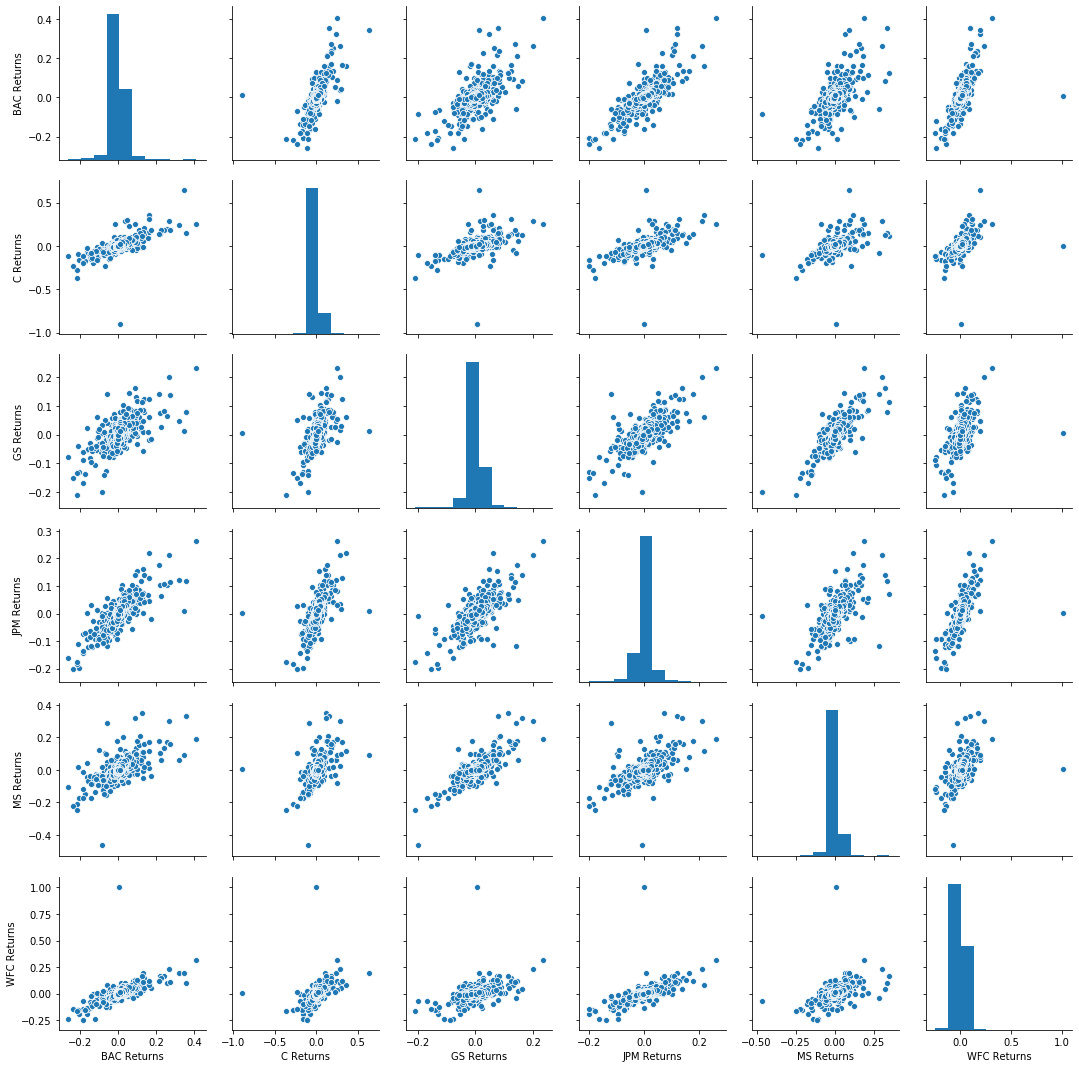

In [12]:
# Exclude first row of NaN values
sns.pairplot(returns[1:])

* Citigroup returns much more centered around 0 than most other banks as seen by horizontal nature of row-wise plots and vertical nature of column-wise plots.
* Pattern is significantly more visible in Google Finance data used in the solutions notebook, will be dependant on quality of data returned from different APIs/sources.

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [13]:
# pd.DataFrame.idxmin() Return index of first occurrence of minimum over requested axis
returns.idxmin()

BAC Returns   2009-04-08
C Returns     2011-05-06
GS Returns    2008-11-21
JPM Returns   2009-01-20
MS Returns    2008-10-10
WFC Returns   2008-07-15
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

* Citigroup had a stock split

In [14]:
returns.idxmax()

BAC Returns   2009-01-16
C Returns     2009-02-26
GS Returns    2009-01-16
JPM Returns   2009-01-16
MS Returns    2008-10-08
WFC Returns   2006-08-11
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [15]:
returns.std()

BAC Returns    0.037062
C Returns      0.043327
GS Returns     0.025155
JPM Returns    0.027392
MS Returns     0.035599
WFC Returns    0.035655
dtype: float64

In [16]:
returns.loc["2015-12-31":"2015-01-01"].std()

BAC Returns    0.016216
C Returns      0.015376
GS Returns     0.014152
JPM Returns    0.014088
MS Returns     0.016353
WFC Returns    0.012650
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

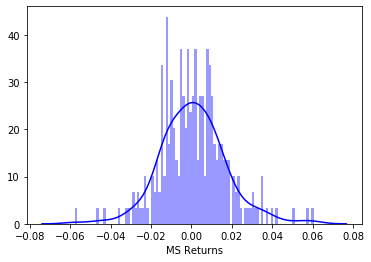

In [17]:
sns.distplot(returns.loc["2015-12-30":"2015-01-01"]["MS Returns"], color = "blue", bins = 100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

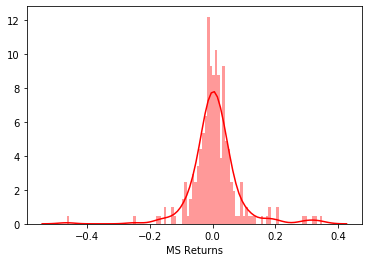

In [18]:
sns.distplot(returns.loc["2008-12-30":"2008-01-01"]["MS Returns"], color = "red", bins = 100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

<Figure size 432x288 with 0 Axes>

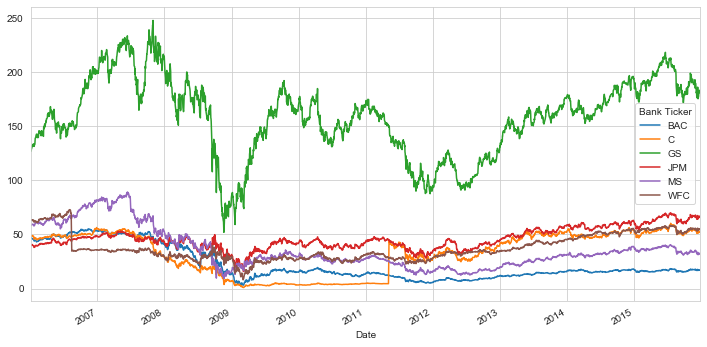

In [26]:
plt.tight_layout()
bank_stocks.xs(key = "Close", axis = 1, level = "Stock Info").plot(figsize = (12,6))


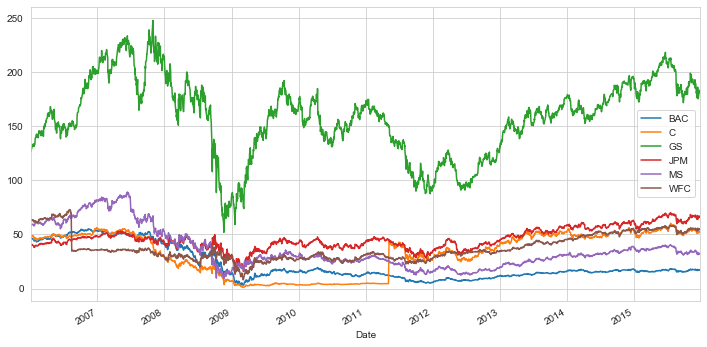

In [29]:
for i in tickers:
    bank_stocks[i]["Close"].plot(figsize = (12,6), label = i)
plt.legend()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [30]:
bank_stocks.head()

Bank Ticker    BAC                                                         \
Stock Info    Open   High    Low  Close      Volume ExDividend SplitRatio   
Date                                                                        
2015-12-31   17.01  17.07  16.83  16.83  47106760.0        0.0        1.0   
2015-12-30   17.20  17.24  17.04  17.05  35035518.0        0.0        1.0   
2015-12-29   17.25  17.35  17.16  17.28  45628449.0        0.0        1.0   
2015-12-28   17.22  17.23  16.98  17.13  41759993.0        0.0        1.0   
2015-12-24   17.32  17.38  17.22  17.27  29373415.0        0.0        1.0   

Bank Ticker                                   ...     WFC                     \
Stock Info     AdjOpen    AdjHigh     AdjLow  ...     Low  Close      Volume   
Date                                          ...                              
2015-12-31   16.564256  16.622684  16.388973  ...  54.220  54.36  10929420.0   
2015-12-30   16.749277  16.788229  16.593470  ...  54.794  54.89   8016893.0   
2015-12-29   16.797967  16.895347  16.710326  ...  54.990  55.29   7894876.0   
2015-12-28   16.768753  16.778491  16.535042  ...  54.170  54.68   8288759.0   
2015-12-24   16.866133  16.924561  16.768753  ...  54.710  54.82   4999417.0   

Bank Ticker                                                                    \
Stock Info  ExDividend SplitRatio    AdjOpen    AdjHigh     AdjLow   AdjClose   
Date                                                                            
2015-12-31         0.0        1.0  51.350518  51.764921  51.077327  51.209212   
2015-12-30         0.0        1.0  52.066467  52.104149  51.618057  51.708493   
2015-12-29         0.0        1.0  51.915741  52.141830  51.802696  52.085308   
2015-12-28         0.0        1.0  51.388199  51.604868  51.030225  51.510664   
2015-12-24         0.0        1.0  51.783856  51.896900  51.538926  51.642550   

Bank Ticker              
Stock Info    AdjVolume  
Date                     
2015-12-31   10929420.0  
2015-12-30    8016893.0  
2015-12-29    7894876.0  
2015-12-28    8288759.0  
2015-12-24    4999417.0  

[5 rows x 72 columns]

In [37]:
BAC.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2015-12-31,17.01,17.07,16.83,16.83,47106760.0,0.0,1.0,16.564256,16.622684,16.388973,16.388973,47106760.0
2015-12-30,17.20,17.24,17.04,17.05,35035518.0,0.0,1.0,16.749277,16.788229,16.593470,16.603208,35035518.0
2015-12-29,17.25,17.35,17.16,17.28,45628449.0,0.0,1.0,16.797967,16.895347,16.710326,16.827181,45628449.0
2015-12-28,17.22,17.23,16.98,17.13,41759993.0,0.0,1.0,16.768753,16.778491,16.535042,16.681112,41759993.0
2015-12-24,17.32,17.38,17.22,17.27,29373415.0,0.0,1.0,16.866133,16.924561,16.768753,16.817443,29373415.0


In [41]:
BAC.loc["2009-01-01"]

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,


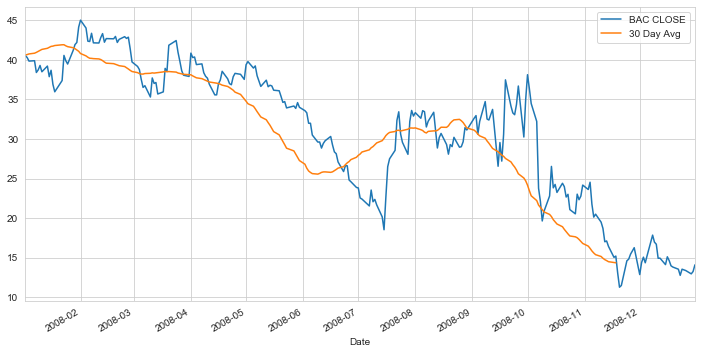

In [44]:
BAC["Close"].loc["2009-01-01":"2008-01-01"].plot(figsize = (12,6), label = "BAC CLOSE")
BAC["Close"].loc["2009-01-01":"2008-01-01"].rolling(window = 30).mean().plot(figsize = (12, 6), label = "30 Day Avg")
plt.legend()


** Create a heatmap of the correlation between the stocks Close Price.**

In [45]:
bank_stocks.head()

Bank Ticker    BAC                                                         \
Stock Info    Open   High    Low  Close      Volume ExDividend SplitRatio   
Date                                                                        
2015-12-31   17.01  17.07  16.83  16.83  47106760.0        0.0        1.0   
2015-12-30   17.20  17.24  17.04  17.05  35035518.0        0.0        1.0   
2015-12-29   17.25  17.35  17.16  17.28  45628449.0        0.0        1.0   
2015-12-28   17.22  17.23  16.98  17.13  41759993.0        0.0        1.0   
2015-12-24   17.32  17.38  17.22  17.27  29373415.0        0.0        1.0   

Bank Ticker                                   ...     WFC                     \
Stock Info     AdjOpen    AdjHigh     AdjLow  ...     Low  Close      Volume   
Date                                          ...                              
2015-12-31   16.564256  16.622684  16.388973  ...  54.220  54.36  10929420.0   
2015-12-30   16.749277  16.788229  16.593470  ...  54.794  54.89   8016893.0   
2015-12-29   16.797967  16.895347  16.710326  ...  54.990  55.29   7894876.0   
2015-12-28   16.768753  16.778491  16.535042  ...  54.170  54.68   8288759.0   
2015-12-24   16.866133  16.924561  16.768753  ...  54.710  54.82   4999417.0   

Bank Ticker                                                                    \
Stock Info  ExDividend SplitRatio    AdjOpen    AdjHigh     AdjLow   AdjClose   
Date                                                                            
2015-12-31         0.0        1.0  51.350518  51.764921  51.077327  51.209212   
2015-12-30         0.0        1.0  52.066467  52.104149  51.618057  51.708493   
2015-12-29         0.0        1.0  51.915741  52.141830  51.802696  52.085308   
2015-12-28         0.0        1.0  51.388199  51.604868  51.030225  51.510664   
2015-12-24         0.0        1.0  51.783856  51.896900  51.538926  51.642550   

Bank Ticker              
Stock Info    AdjVolume  
Date                     
2015-12-31   10929420.0  
2015-12-30    8016893.0  
2015-12-29    7894876.0  
2015-12-28    8288759.0  
2015-12-24    4999417.0  

[5 rows x 72 columns]

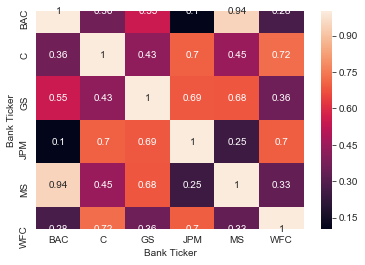

In [56]:
# Reminder: figure out out to fix some numbers being cropped out
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(), annot = True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

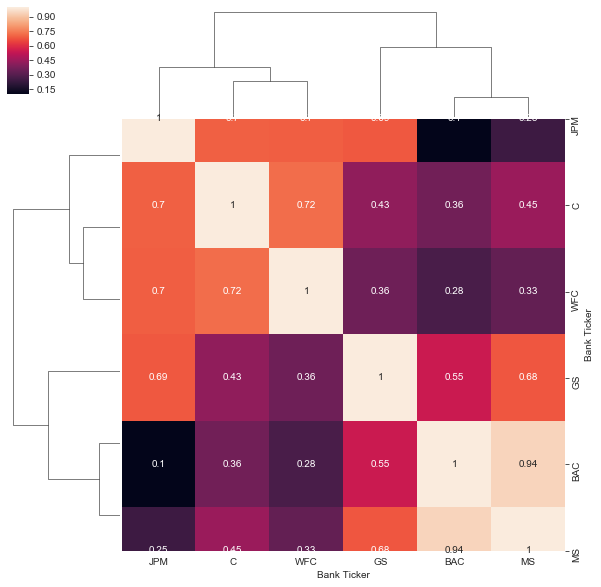

In [57]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(), annot = True)

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.